**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
# Write your code here
import numpy as np
from types import SimpleNamespace

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [42]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


Expected Utility:
Career 1: 1.0
Career 2: 2.0
Career 3: 3.0

Average Realized Utility:
Career 1: 1.0019337362818994
Career 2: 2.004349736023759
Career 3: 3.00243164668468


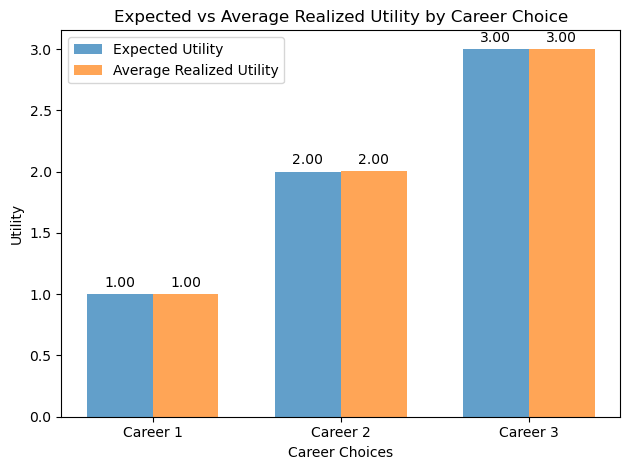

In [70]:
import matplotlib.pyplot as plt

# Parameters
J = 3  # Number of careers
N = 10  # Number of graduate types
K = 10000  # Number of simulations
sigma = 2.0  # Standard deviation of noise

# True values of careers
v_j = np.array([1, 2, 3])

# Initialize arrays to store results
expected_utility = np.zeros(J)
average_realized_utility = np.zeros(J)

# Seed for reproducibility
np.random.seed(42)

# Simulation loop
for j in range(J):
    # Set a unique seed for each career choice
    np.random.seed(42 + j)
    
    # Simulate epsilon for all graduates and all draws
    epsilons = np.random.normal(loc=0, scale=sigma, size=(N, K))
    
    # Calculate utilities
    utilities = v_j[j] + epsilons
    
    # Calculate expected utility (true value of the career)
    expected_utility[j] = v_j[j]
    
    # Calculate average realized utility
    average_realized_utility[j] = np.mean(utilities)

# Print results
print("Expected Utility:")
for j in range(J):
    print(f"Career {j+1}: {expected_utility[j]}")

print("\nAverage Realized Utility:")
for j in range(J):
    print(f"Career {j+1}: {average_realized_utility[j]}")

# Create bar chart
careers = ['Career 1', 'Career 2', 'Career 3']
x = np.arange(len(careers))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, expected_utility, width, label='Expected Utility', alpha=0.7)
rects2 = ax.bar(x + width/2, average_realized_utility, width, label='Average Realized Utility', alpha=0.7)

# Add labels, title, and legend
ax.set_xlabel('Career Choices')
ax.set_ylabel('Utility')
ax.set_title('Expected vs Average Realized Utility by Career Choice')
ax.set_xticks(x)
ax.set_xticklabels(careers)
ax.legend()

# Add value labels on bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

fig.tight_layout()

plt.show()

The above figure shows that the expected utility is the same as the baseline utility from the respective career paths. This makes sense at the expected value of the baseline utility is given by the basteline utility.
The average realized utility describes the utility that each graduate actually obtains. Here it is important to point out that the expected utility equals the average realized utility as the payoff from different careers is known.

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

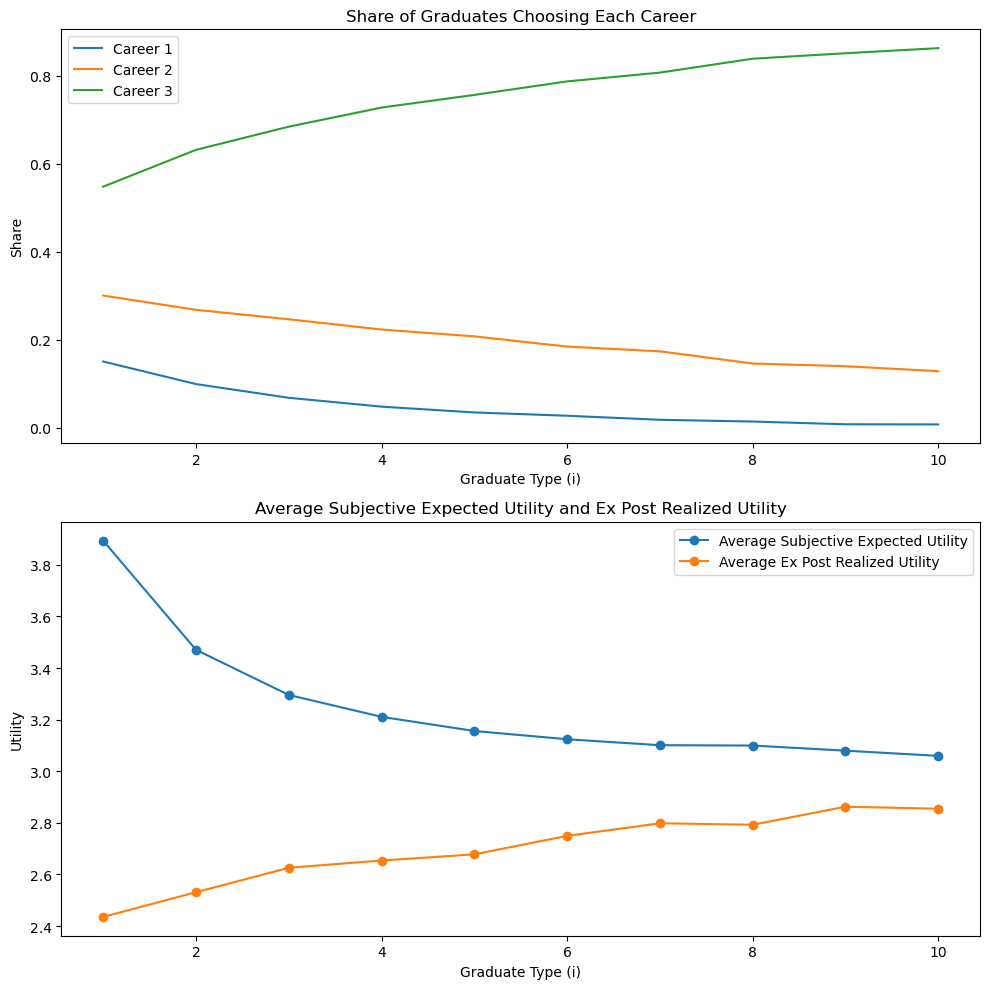

In [72]:
# Simulation
np.random.seed(42)  # Seed for reproducibility
for k in range(K):
    for i in range(1, N + 1):
        F_i = i
        prior_expected_utility = np.zeros(J)
        
        for j in range(J):
            noise_terms = np.random.normal(0, sigma, F_i)
            prior_expected_utility[j] = v_j[j] + np.mean(noise_terms)
        
        chosen_career = np.argmax(prior_expected_utility)
        share_of_graduates[i - 1, chosen_career] += 1
        
        graduate_noise = np.random.normal(0, sigma)
        subjective_utility = prior_expected_utility[chosen_career]
        realized_utility = v_j[chosen_career] + graduate_noise
        
        avg_subjective_utility[i - 1] += subjective_utility
        avg_realized_utility[i - 1] += realized_utility

# Normalize results
share_of_graduates /= K
avg_subjective_utility /= K
avg_realized_utility /= K

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Share of graduates choosing each career
for j in range(J):
    axes[0].plot(range(1, N + 1), share_of_graduates[:, j], label=f'Career {j+1}')
axes[0].set_title('Share of Graduates Choosing Each Career')
axes[0].set_xlabel('Graduate Type (i)')
axes[0].set_ylabel('Share')
axes[0].legend()

# Average subjective expected utility and ex post realized utility
axes[1].plot(range(1, N + 1), avg_subjective_utility, marker='o', label='Average Subjective Expected Utility')
axes[1].plot(range(1, N + 1), avg_realized_utility, marker='o', label='Average Ex Post Realized Utility')
axes[1].set_title('Average Subjective Expected Utility and Ex Post Realized Utility')
axes[1].set_xlabel('Graduate Type (i)')
axes[1].set_ylabel('Utility')
axes[1].legend()

plt.tight_layout()
plt.show()

As we can see in the Figure describing the Share of Graduates Choosing Each Career, more graduates choose career 3 the more friends that they have. This is because each graduate gains a greater certainty on what payoff to expect from each career path. The uncertainty of the error term therefore increases the chance of a graduate choosing career 3.
All of this means that the Average Ex Post Realized utility increases, as more graduates choose career 3.

Explain the intuition behind Average Subjective Expected Utility!!!

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

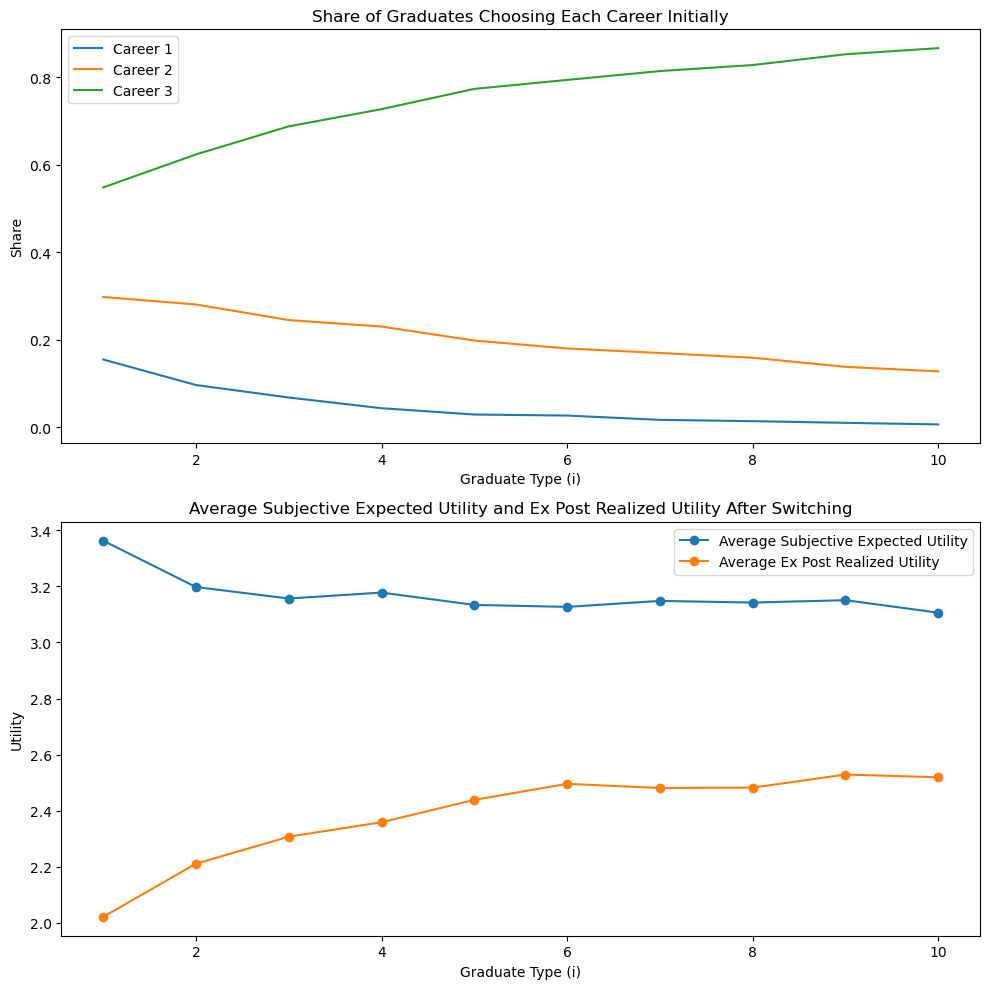

Share of graduates that chose to switch careers, conditional on initial choice:
Career 1: 0.03340334
Career 2: 0.10436043499999999
Career 3: 0.152455244


In [74]:
# Seed for reproducibility
np.random.seed(42)

# Simulation
for k in range(K):
    for i in range(1, N + 1):
        F_i = i
        # Initial career choice
        prior_expected_utility = v_j + np.random.normal(0, sigma, (J, F_i)).mean(axis=1)
        chosen_career = np.argmax(prior_expected_utility)
        share_of_graduates[i - 1, chosen_career] += 1
        
        # Realized utility for the chosen career
        realized_utility = v_j[chosen_career] + np.random.normal(0, sigma)
        
        # Update priors with switching cost
        new_prior_expected_utility = np.zeros(J)
        for j in range(J):
            if j == chosen_career:
                new_prior_expected_utility[j] = realized_utility
            else:
                new_prior_expected_utility[j] = v_j[j] + np.random.normal(0, sigma, F_i).mean() - c
        
        # New optimal career choice
        new_chosen_career = np.argmax(new_prior_expected_utility)
        if new_chosen_career != chosen_career:
            switching_shares[i - 1, chosen_career] += 1
        
        # Realized utility for the new chosen career
        new_realized_utility = v_j[new_chosen_career] + np.random.normal(0, sigma)
        if new_chosen_career != chosen_career:
            new_realized_utility -= c
        
        avg_subjective_utility[i - 1] += new_prior_expected_utility[new_chosen_career]
        avg_realized_utility[i - 1] += new_realized_utility

# Normalize results
share_of_graduates /= K
avg_subjective_utility /= K
avg_realized_utility /= K
switching_shares /= K

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Share of graduates choosing each career initially
for j in range(J):
    axes[0].plot(range(1, N + 1), share_of_graduates[:, j], label=f'Career {j+1}')
axes[0].set_title('Share of Graduates Choosing Each Career Initially')
axes[0].set_xlabel('Graduate Type (i)')
axes[0].set_ylabel('Share')
axes[0].legend()

# Average subjective expected utility and ex post realized utility
axes[1].plot(range(1, N + 1), avg_subjective_utility, marker='o', label='Average Subjective Expected Utility')
axes[1].plot(range(1, N + 1), avg_realized_utility, marker='o', label='Average Ex Post Realized Utility')
axes[1].set_title('Average Subjective Expected Utility and Ex Post Realized Utility After Switching')
axes[1].set_xlabel('Graduate Type (i)')
axes[1].set_ylabel('Utility')
axes[1].legend()

plt.tight_layout()
plt.show()

# Print the share of graduates that chose to switch careers
print("Share of graduates that chose to switch careers, conditional on initial choice:")
for j in range(J):
    print(f"Career {j+1}: {np.mean(switching_shares[:, j])}")

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [ ]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [ ]:
# write your answer here

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [ ]:
# write your answer here

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [ ]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [ ]:
# write your answer here

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [ ]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [ ]:
# write your answer here